# E-tivity 1: Exploratory Data Analysis

### Import required modules and dataset

In [43]:
#import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
#load bank data - bank.csv
df = pd.read_csv("bank.csv")

### Examine the data

Looking at the data to get an idea of the data in it

In [45]:
# First 10 rows of the dataframe
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no
5,46.0,self-employed,divorced,tertiary,no,926,yes,no,cellular,1,apr,463,1,133,3,failure,no
6,34.0,blue-collar,married,secondary,no,1924,yes,yes,cellular,1,apr,161,2,253,1,failure,no
7,45.0,services,divorced,secondary,no,396,yes,yes,cellular,1,apr,251,4,329,4,failure,no
8,58.0,management,divorced,tertiary,no,315,yes,no,cellular,1,apr,121,2,135,2,failure,no
9,49.0,management,divorced,tertiary,no,20727,no,no,cellular,1,apr,285,3,132,2,failure,no


In [46]:
# Last 10 rows of the dataframe
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1990,36.0,technician,married,tertiary,no,376,no,no,cellular,16,sep,173,1,-1,0,NaN,yes
1991,39.0,admin.,divorced,secondary,no,112,no,no,cellular,16,sep,574,3,-1,0,NaN,yes
1992,78.0,retired,divorced,primary,no,527,no,no,cellular,16,sep,193,1,-1,0,NaN,yes
1993,35.0,management,married,NaN,no,2326,yes,yes,cellular,16,sep,319,1,-1,0,NaN,yes
1994,26.0,student,single,secondary,no,655,no,no,cellular,16,sep,190,1,-1,0,NaN,yes
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [47]:
# Print summary for numerical attributes
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


From the head, tail and describe functions i can deduce that there are 2000 rows of data and that age has 12 missing values. I can see that there are also missing values in the education, contact and poutcome columns represented by 'NaN'.

I can use a heatmap to examine the correlation matrix of these numerical values and also get the value of correlation.

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.139874,0.042411,0.076732,-0.002876,0.009121,0.063805
balance,0.139874,1.000000,0.037078,0.096633,0.025103,-0.033014,0.030292
day,0.042411,0.037078,1.000000,0.058597,-0.019719,0.054188,0.063716
duration,0.076732,0.096633,0.058597,1.000000,-0.005188,-0.095650,-0.015965
campaign,-0.002876,0.025103,-0.019719,-0.005188,1.000000,0.030929,0.140995
pdays,0.009121,-0.033014,0.054188,-0.095650,0.030929,1.000000,0.218636
previous,0.063805,0.030292,0.063716,-0.015965,0.140995,0.218636,1.000000


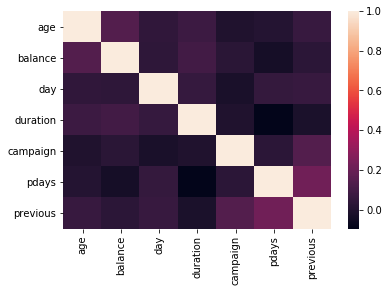

In [48]:
sns.heatmap(df.corr())
df.corr()

Now i drop all rows that have missing data in them which leaves 1452 rows. This result means that 548 rows have been dropped.

I then convert all data to numerical data to allow me to create a heatmap of all to find correlations.

In [49]:
data=df.dropna()

In [50]:
data.count()

age           1452
job           1452
marital       1452
education     1452
default       1452
balance       1452
housing       1452
loan          1452
contact       1452
day           1452
month         1452
duration      1452
campaign      1452
pdays         1452
previous      1452
poutcome      1452
subscribed    1452
dtype: int64

In [51]:
data = data.apply(lambda col: pd.factorize(col, sort=True)[0])

In [52]:
data.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1956,13,4,2,2,0,210,0,0,0,22,11,366,1,43,3,2,1
1957,39,4,1,2,0,950,0,0,0,22,11,219,0,43,2,2,1
1958,10,6,2,2,0,460,0,0,0,22,11,246,3,120,0,2,1
1959,20,4,2,2,0,909,1,0,0,23,11,207,1,287,1,2,1
1960,29,4,1,2,0,608,1,1,0,23,11,224,0,42,13,2,1
1961,35,7,0,1,0,67,0,0,0,26,11,237,5,129,3,2,1
1962,18,7,1,1,0,826,0,0,0,27,11,255,1,123,0,2,1
1963,28,4,2,2,0,278,1,0,0,27,11,473,1,43,11,2,1
1964,41,5,1,1,0,77,0,0,0,28,11,207,0,43,2,2,1
1965,8,4,2,2,0,322,0,0,0,28,11,534,0,167,3,2,1


In [53]:
data.count()

age           1452
job           1452
marital       1452
education     1452
default       1452
balance       1452
housing       1452
loan          1452
contact       1452
day           1452
month         1452
duration      1452
campaign      1452
pdays         1452
previous      1452
poutcome      1452
subscribed    1452
dtype: int64

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.032122,-0.445378,-0.243752,-0.018242,0.125808,-0.140541,-0.002593,0.201786,0.030085,0.066296,0.110590,-0.041648,-0.103495,0.029083,0.086846,0.105968
job,-0.032122,1.000000,0.036366,0.102465,-0.047571,0.034864,-0.118974,-0.000537,-0.052768,0.049996,0.008047,0.058373,0.005952,-0.003284,-0.001884,0.029824,0.059794
marital,-0.445378,0.036366,1.000000,0.152802,-0.040618,-0.012977,-0.059915,-0.053955,-0.033060,0.018449,0.058607,0.003686,0.026535,0.020819,0.023716,0.083479,0.117234
education,-0.243752,0.102465,0.152802,1.000000,0.019003,0.043314,-0.066651,-0.004677,-0.101163,0.052586,0.094687,-0.006236,0.011458,-0.081058,0.034364,0.100906,0.112186
default,-0.018242,-0.047571,-0.040618,0.019003,1.000000,-0.102976,-0.017459,0.082836,-0.023606,-0.003412,-0.020849,-0.074305,0.015177,0.020776,-0.043910,-0.061793,-0.058973
balance,0.125808,0.034864,-0.012977,0.043314,-0.102976,1.000000,-0.169923,-0.123162,0.117296,0.076167,0.130618,0.151669,0.015474,-0.091759,0.067225,0.173411,0.248570
housing,-0.140541,-0.118974,-0.059915,-0.066651,-0.017459,-0.169923,1.000000,0.143652,-0.081480,-0.082918,-0.256927,-0.270480,0.023880,0.294961,-0.072985,-0.396005,-0.505528
loan,-0.002593,-0.000537,-0.053955,-0.004677,0.082836,-0.123162,0.143652,1.000000,-0.006792,0.025803,-0.119107,-0.138904,0.011163,0.044356,-0.037205,-0.212370,-0.268667
contact,0.201786,-0.052768,-0.033060,-0.101163,-0.023606,0.117296,-0.081480,-0.006792,1.000000,0.015729,0.021730,0.011813,0.024433,-0.005444,0.046411,0.016956,0.037611
day,0.030085,0.049996,0.018449,0.052586,-0.003412,0.076167,-0.082918,0.025803,0.015729,1.000000,0.149209,0.053177,-0.058567,0.000842,0.047432,0.046223,0.106503


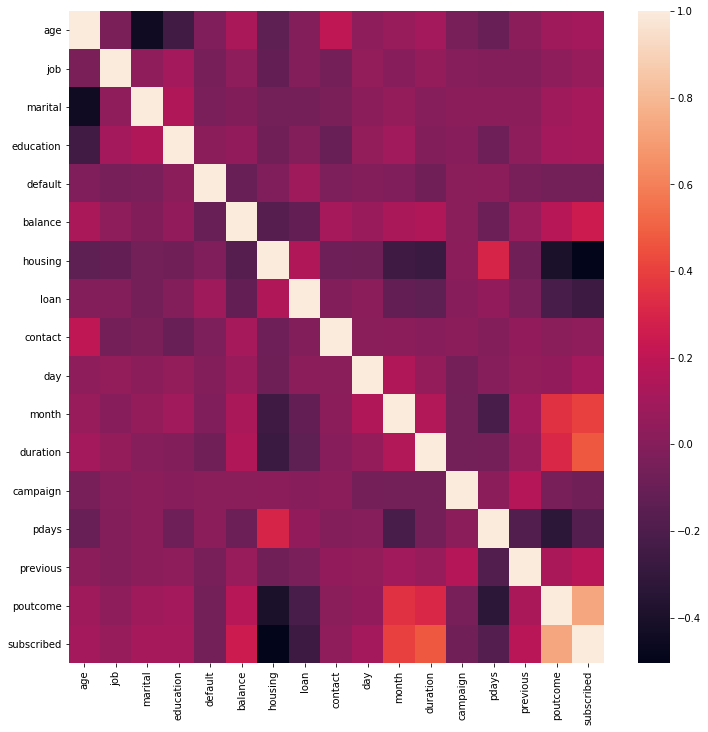

In [55]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr())
data.corr()

The heatmap highlights a strong correlation between 'poutcome' and 'subscription' and also correlations between: 

   -  duration and subscribed
   -  balance and subscribed
   -  month and subscribed        


In [111]:
#get the data for subscribed and month to highlight which month was most successful in the campaign
datamthsub = data[['month','subscribed']].dropna()

In [112]:
datamthsub.describe()

,month,subscribed
count,411.000000,411.000000
mean,6.180049,0.978102
std,3.710459,0.146528
min,0.000000,0.000000
25%,5.000000,1.000000
50%,7.000000,1.000000
75%,9.000000,1.000000
max,11.000000,1.000000


Getting the successful subscriptions to term deposits (subscribed = 1)

In [113]:
rslt_df = datamthsub[datamthsub['subscribed'] == 1] 
print('\nResult dataframe :\n', rslt_df) 





Result dataframe :
       month  subscribed
1031    0.0         1.0
1032    0.0         1.0
1033    0.0         1.0
1034    0.0         1.0
1035    0.0         1.0
...     ...         ...
1961   11.0         1.0
1962   11.0         1.0
1963   11.0         1.0
1964   11.0         1.0
1965   11.0         1.0

[402 rows x 2 columns]


In [118]:
#grouped = rslt_df.groupby('month')
#grouped

In [115]:
#grouped.size()

month
0.0     40
1.0     61
5.0     56
6.0     39
7.0     24
8.0     64
9.0     19
10.0    41
11.0    58
dtype: int64

Grouping the data by month (getting the number of subscriptions per month)

In [126]:
dffiltered = rslt_df.groupby(
  pd.Grouper(
    key='month'
  )
).size()

In [127]:
dffiltered.head(10)

month
0.0     40
1.0     61
5.0     56
6.0     39
7.0     24
8.0     64
9.0     19
10.0    41
11.0    58
dtype: int64